83.29768


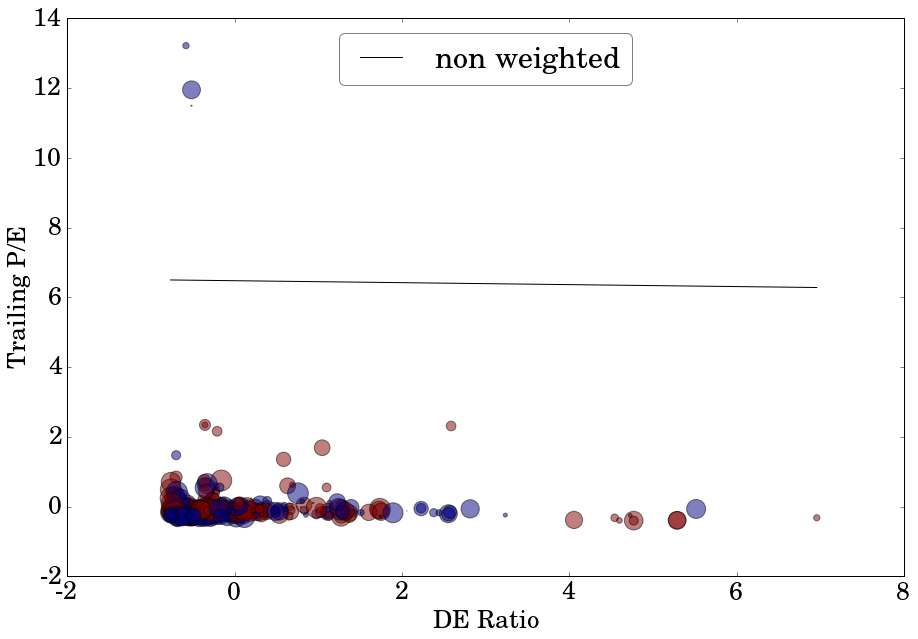

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, preprocessing
import pandas as pd
from matplotlib import style
#style.use("ggplot")
%matplotlib inline

def data_checker():
    #pass
    data = pd.DataFrame.from_csv("key_stats.csv")
    if np.isnan(data):
        print np.where(np.isnan(data))
    else:
        print "Data is clean."

def create_data_set(features = ["DE Ratio", "Trailing P/E"]):
    #pass
    df = pd.DataFrame.from_csv("key_stats.csv")
    df = df.dropna()
    
#     index = df["DE Ratio"].index[df["DE Ratio"].apply(np.isnan)] #find Index
#     #replace Nan of the nth index with value from Nth value from list
#     for item in index:
#         df.set_value(item, "DE Ratio", df["DE Ratio"].mean())
#         df.set_value(item, "Trailing P/E", df["Trailing P/E"].mean())
    
    df = df[:500]
    X = np.array(df[features].values)
    X = preprocessing.scale(X)
    Y = (df["Status"]
         .replace("SELL",0)
         .replace("BUY",1)
         .values.tolist())
    
    print df["DE Ratio"].mean()


    return X,Y



def Build_Data_Set(features = ["DE Ratio",
                               "Trailing P/E"]):
    data_df = pd.DataFrame.from_csv("key_stats.csv")

    data_df = data_df[:200]

    X = np.array(data_df[features].values)

    y = (data_df["Status"]
         .replace("underperform",0)
         .replace("outperform",1)
         .values.tolist())


    return X,y

def Analysis():
    X, y = create_data_set()

    clf = svm.SVC(kernel="linear", C= 1.0)
    clf.fit(X,y)
    
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min(X[:, 0]), max(X[:, 0]))
    yy = a * xx - clf.intercept_[0] / w[1]
    
    fig, ax = plt.subplots(figsize=(15,10))
    ax.set_axis_bgcolor('white')
    color_1 = 'green'
    color_2 = 'blue'
    color_3 = 'red'
    color_4 = 'black'
    plt.rc("font", size=25)
    N = 200
    colors = np.random.rand(N)
    area = np.pi * (12 * np.random.rand(N))**2
    ax.scatter(X[:, 0],X[:, 1], c=y, s=area, alpha=0.5)
    ax.plot(xx,yy, color=color_4, label = r'non weighted')

    #h0 = plt.plot(xx,yy, "k-", label="non weighted")
    plt.ylabel("Trailing P/E")
    plt.xlabel("DE Ratio")
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    #plt.legend()
    ax.legend(loc='upper center', fancybox=True, framealpha=0.5)

    plt.show()
    
Analysis()
# create_data_set()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, preprocessing
import pandas as pd
from matplotlib import style
from __future__ import division

#--
from parameters import *
#style.use("ggplot")
%matplotlib inline

class Linear_SVC_SP500(object):
    #code
    def __init__(self, file, features):
        #pass
        self.file = file
        self.features = features
    
    #----------------------    
    def data_framer(self):
        #pass
        data_frame = pd.DataFrame.from_csv(self.file)
        # Check the data frame if it contains 'NaN's
        if data_frame.isnull().values.any():
            data_frame = data_frame.dropna()
            print "Found 'NaN's and dropped all of them."
        else:
            data_frame = data_frame
            print "No 'NaN's were found, data clean."
            
        return data_frame
    
    #-------------------
    def data_sets(self, train_size):
        #pass
        data_frame =  self.data_framer()
        #data_frame = data_frame.reindex(np.random.permutation(data_frame.index))
        data_frame = data_frame[:train_size]
        X_values = np.array(data_frame[self.features].values)
        X_values = preprocessing.scale(X_values) # Normalization
        Y_values = (data_frame["Status"]
             .replace("SELL",0)
             .replace("BUY",1)
             .values.tolist()) # Labelling the data
    
        return X_values,Y_values
        
    #--------------------------
    def classifier(self, test_size, train_size, option):
        X_value, Y_value = self.data_sets(train_size)
        
        if option == True: 
            # get classifier for training only
            classified = svm.SVC(kernel="linear", C= 1.0)
            classified.fit(X_value[:test_size], Y_value[:test_size])
            return X_value, Y_value, classified
        
        elif option == False: 
            # get classifier for for plotting only
            classified = svm.SVC(kernel="linear", C= 1.0)
            classified.fit(X_value, Y_value)
            return X_value, Y_value, classified   
    
    #-----------------------
    def data_analysis(self, data_size):
        #X_value, Y_value = self.data_sets(data_size)
        X_value, Y_value, clf = self.classifier(0, data_size, False)
        # Below is only for visualization purpose, it draw a line based on decision
        w = clf.coef_[0]
        a = -w[0] / w[1]
        x_cords = np.linspace(min(X_value[:, 0]), max(X_value[:, 0]))
        y_cords = a * x_cords - clf.intercept_[0] / w[1]
        
        return x_cords, y_cords
    # 
    #-------------------
    def data_predict(self, data_size, test_size):
        #X, Y = self.data_sets()
        X, Y, clf = self.classifier(test_size, data_size, True)
        
        count = 0
        for x in range (1, test_size+1):
            if clf.predict(X[-x])[0] == Y[-x]:
                count += 1
                
        accuracy = (count/test_size)*100.00
        print "Data size is:", len(X)
        print "Accuracy is:", accuracy
        print count/test_size*100
    
    
    #----------------------
    def data_plotter(self, data_size):
        
        X, Y = self.data_sets(data_size)
        x_cords, y_cords = self.data_analysis(data_size)
        
        N = 200
        colors = np.random.rand(N)
        area = np.pi * (12 * np.random.rand(N))**2
        
        fig, ax = plt.subplots(figsize=(15,10))
        color = 'black'
        ax.set_axis_bgcolor('white')
        ax.scatter(X[:, 0],X[:, 1], c=Y, s=area, alpha=0.5)
        ax.plot(x_cords,y_cords, color=color, label = r'Non weighted')
        
        plt.ylabel("Trailing P/E")
        plt.xlabel("DE Ratio")
        plt.rc('text', usetex=True)
        plt.rc('font', family='serif')
        plt.tick_params(axis='both', which='major', labelsize=30)
        plt.rc("font", size=30)
        plt.legend(loc='upper center', fancybox=True, framealpha=1)
        plt.title("Classifier for 'Trailing P/E' \& 'DE Ratio'")
        savefig('Trailing_DE_Ratio.png')
        savefig('Trailing_DE_Ratio.pdf')
        plt.show()
        
        return plt
    
    
# self execution/testing
if __name__ == '__main__':
    import warnings
    warnings.filterwarnings("ignore")
    #--------------------------------
    
    _file = "key_stats.csv"
    _features = ["DE Ratio", "Trailing P/E"]
    caller = Linear_SVC_SP500(_file, _features)
    _plot_data = 500
    caller.data_plotter(_plot_data)
    
    _train = 1314
    _test = 1200
    _features = FEATURES
    caller.data_predict(_train, _test)
    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
from matplotlib import style
style.use("ggplot")
%matplotlib inline

def Build_Data_Set(features = ["DE Ratio",
                               "Trailing P/E"]):
    data_df = pd.DataFrame.from_csv("key_stats.csv")

    data_df = data_df[:100]

    X = np.array(data_df[features].values)

    y = (data_df["Status"]
         .replace("SELL",0)
         .replace("BUY",1)
         .values.tolist())


    return X,y

def Analysis():
    X, y = Build_Data_Set()

    clf = svm.SVC(kernel="linear", C= 1.0)
    clf.fit(X,y)
    
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min(X[:, 0]), max(X[:, 0]))
    yy = a * xx - clf.intercept_[0] / w[1]

    h0 = plt.plot(xx,yy, "k-", label="non weighted")

    plt.scatter(X[:, 0],X[:, 1],c=y)
    plt.ylabel("Trailing P/E")
    plt.xlabel("DE Ratio")
    plt.legend()

    plt.show()
    
Analysis()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').